In [1]:
import arlpy.uwapm as pm
import numpy as np

In [2]:
rx_range = np.linspace(-5000, 5000, 1081)
rx_depth = np.linspace(0, 750,  720)
depth    = 500

In [3]:
ssp_range = np.array([0, 3000, 5000])
ssp_depth = np.array([10, 150, 300, 400])
ssp       = np.array([[1400,  1350, 1300],
                      [1450,  1350, 1350],
                      [1500,  1450, 1350], 
                      [1450,  1400, 1350]])

In [4]:
tx_freq  = 10
tx_depth = 20

In [5]:
env = pm.init_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP/KRAKEN: attn
        volume_attn     = None,
        
        # ALL: Receiver positoins
        rx_range        = rx_range,                    # m
        rx_depth        = rx_depth,                    # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # ALL: Sound speed profiles
        ssp_depth       = ssp_depth,                   # m
        ssp             = ssp,                         # m/s
        ssp_range       = ssp_range,

        # OALIB: Sound speed interpolation
        ssp_interp      = 'c-linear',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                     # Hz
        tx_depth        = 50,                          # m
        tx_range        = -2000,                       # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((0, depth)), # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                         # m (rms)
        bot_density     = 2.75,                        # g/cm3
        bot_PwaveSpeed  = 6000,                        # m/s 
        bot_SwaveSpeed  = 3500,                        # m/s 
        bot_PwaveAttn   = 0.02,                        # dB/wavelength 
        bot_SwaveAttn   = 0.02,                        # dB/wavelength 
        )

In [6]:
KRAKEN = pm.KRAKEN(env)
KRAKEN.compute_transmission_loss()
KRAKEN.compute_modes()

[WARNING] BELLHOP: Require quadrilatteral SSP interpolation for range depedant SSP !
[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !
[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !
[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !


Modes object with 11 distinct modes

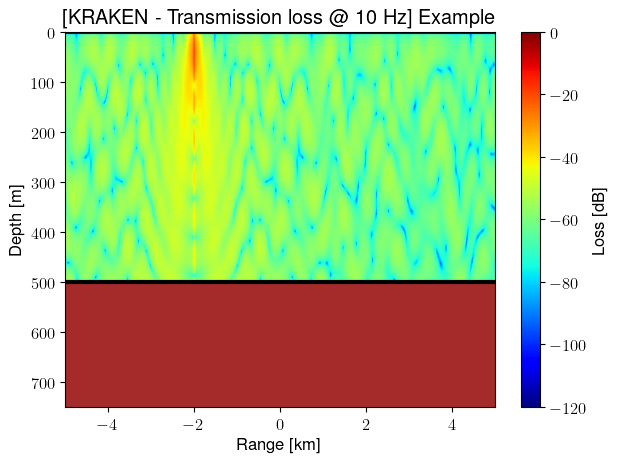

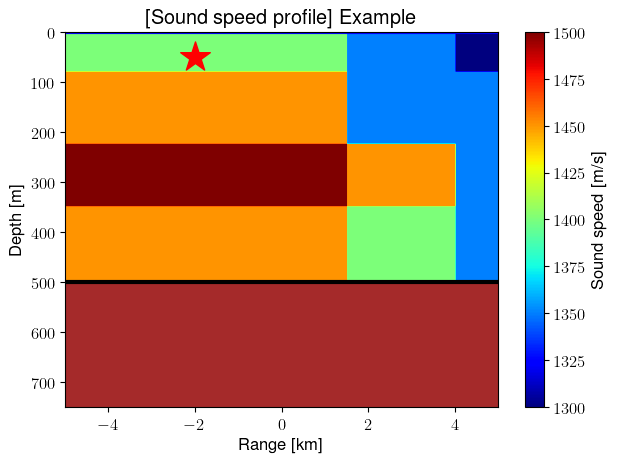

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Modes (10)] Example'}, ylabel='Depth [m]'>)

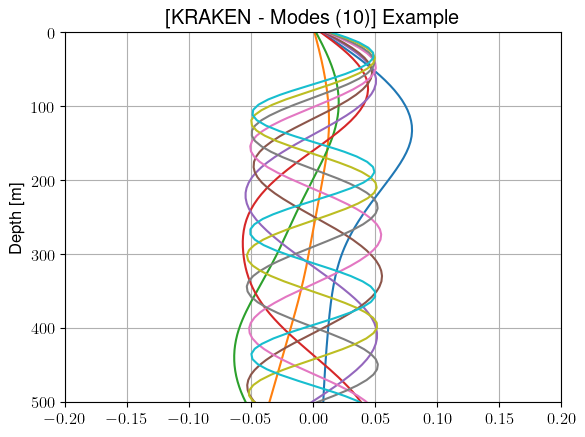

In [7]:
KRAKEN.plot_transmission_loss()
KRAKEN.plot_ssp()
KRAKEN.plot_modes(nMode=5)